In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from math import floor
import Test
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
from sklearn.cluster import KMeans

def LoadData(name):
    df = pd.read_csv('data/' + name + '.csv',
                     index_col=['datetime'],
                     dtype = {"video_id": object, "views": np.float64},
                     parse_dates=['datetime'])
    return df


def Regroup(df, timeGrouperIndex):
    resDf = df.groupby(['video_id', pd.TimeGrouper(timeGrouperIndex)]).mean()
    resDf = resDf.reset_index().set_index('datetime')
    listOfVideoViews = list(resDf.groupby('video_id')['views'].apply(pd.DataFrame.as_matrix))
    return listOfVideoViews

def GetRegrouppedViews(trainDf, testDf, timeGrouperIndex):
    return Regroup(trainDf, timeGrouperIndex), Regroup(testDf, timeGrouperIndex)

In [14]:
trainDf = LoadData('train')
testDf = LoadData('validation')

In [15]:
trainViewsW, trainViewsW = GetRegrouppedViews(trainDf, testDf, 'W')
trainViewsD, trainViewsD = GetRegrouppedViews(trainDf, testDf, 'D')

In [16]:

def ExtractNormilizedSequences(listOfVideoViews, seqLen, minLen, maxLen):
    if(not minLen):
        minLen = 0

    if (not maxLen):
        maxLen = 10e+10

    
    datas = []
    lables = []
    for s in listOfVideoViews:
        if (len(s) > minLen and len(s) < maxLen):
            data = np.array(s[:seqLen])
            maxData = data[seqLen - 1]
            data = data / maxData
            datas.append(data)

    return np.array(datas)


In [17]:
maxLimit = 360 # remove sequences with more then 360 days
minLimit = 30 # remove sequences with less then 30 days
seqLength = 30 # History length

train_inputs = ExtractNormilizedSequences(trainViewsD, seqLength, minLimit, maxLimit)

In [23]:
CLUSTERS_COUNT = 6

kmeans = KMeans(n_clusters=CLUSTERS_COUNT, random_state=0).fit(train_inputs)

def PrintClusterExamples(clusterid, examplesCount = 10):
    for i in range(examplesCount):
        classInd = np.where(kmeans.labels_ == 0)[0]
        plt.plot(train_inputs[classInd[i]])
    plt.show()

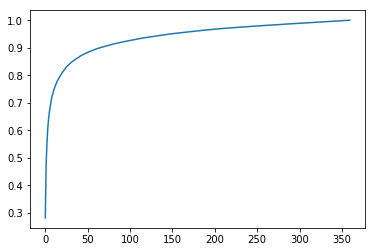

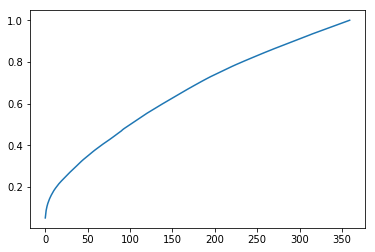

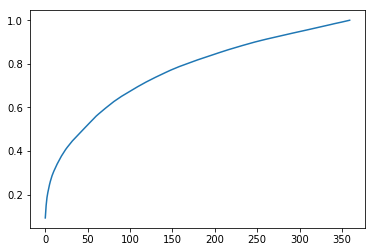

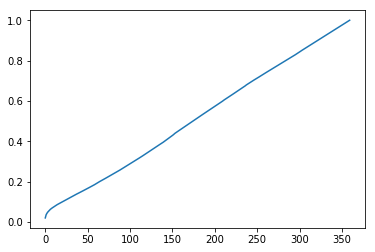

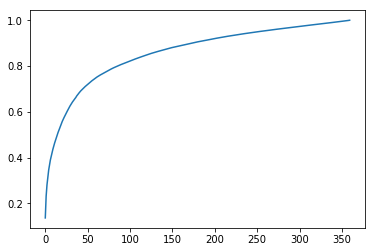

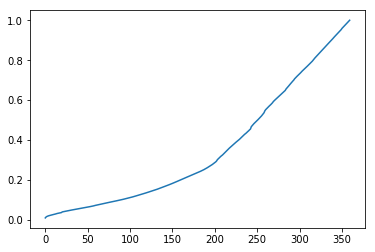

In [24]:
for i in range(CLUSTERS_COUNT):
    menVals = np.mean(train_inputs[np.where(kmeans.labels_ == i)[0]], axis = 0)
    plt.plot(menVals)
    plt.show()

In [20]:
minLimit = 360 # remove sequences with less then 360 days
seqLength = 360 # History length
maxLimit = 100000
train_inputs = np.array(ExtractNormilizedSequences(trainViewsD, seqLength, minLimit, maxLimit))

In [21]:
CLUSTERS_COUNT = 4
kmeans = KMeans(n_clusters=CLUSTERS_COUNT, random_state=0).fit(train_inputs)

def PrintClusterExamples(clusterid, examplesCount = 10):
    for i in range(examplesCount):
        classInd = np.where(kmeans.labels_ == 0)[0]
        plt.plot(train_inputs[classInd[i]])
    plt.show()

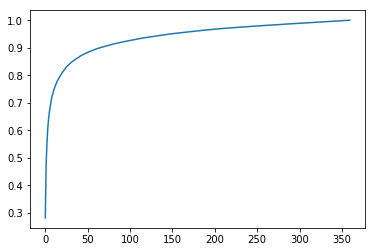

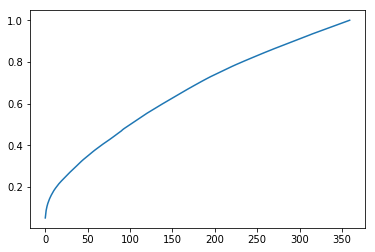

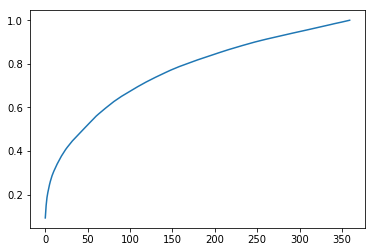

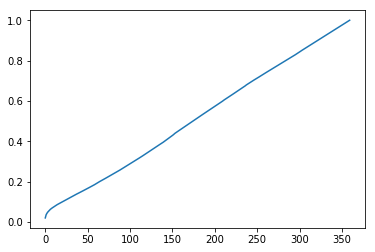

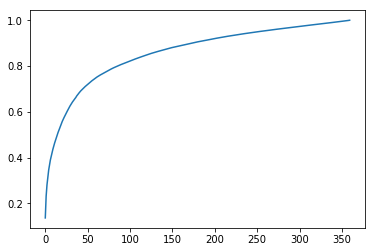

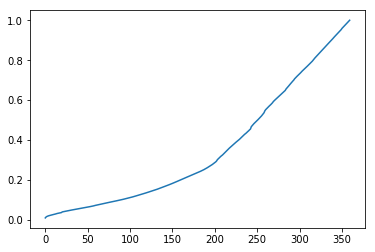

In [25]:
for i in range(CLUSTERS_COUNT):
    menVals = np.mean(train_inputs[np.where(kmeans.labels_ == i)[0]], axis = 0)
    plt.plot(menVals)
    plt.show()